# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents 17 campaigns corresponding to 79,354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

In [3]:
base = '/content/drive/MyDrive/AI ML Certificate with Berkeley Haas/module17_starter/'
df = pd.read_csv(base + 'data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['default'].value_counts()

,count
default,
no,32588
unknown,8597
yes,3


In [7]:
#df['job'].value_counts()
#df['marital'].value_counts()
#df['education'].value_counts()
#df['housing'].value_counts()
#df['loan'].value_counts()
#df['contact'].value_counts()
#df['poutcome'].value_counts()


<Axes: >

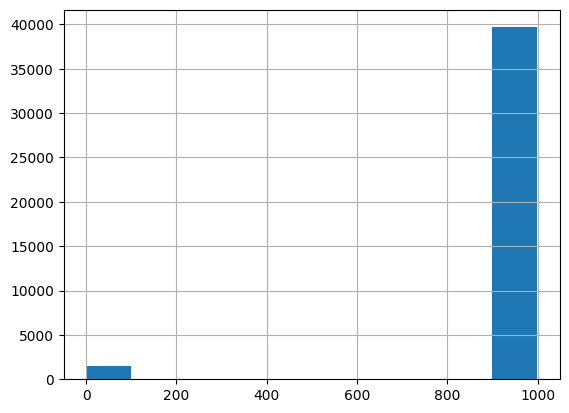

In [8]:
df['pdays'].hist()
#df['previous'].value_counts()

#df['age'].hist()
#df['emp.var.rate'].hist()
#df['cons.price.idx'].hist()
#df['cons.conf.idx'].unique()
#df['euribor3m'].unique()
#df['nr.employed'].unique()
#df['emp.var.rate'].hist(bins=20)
#df['cons.price.idx'].hist(bins=20)
#df['cons.conf.idx'].hist(bins=20)
#df['euribor3m'].hist(bins=50)
#df['nr.employed'].hist(bins=20)

<Axes: >

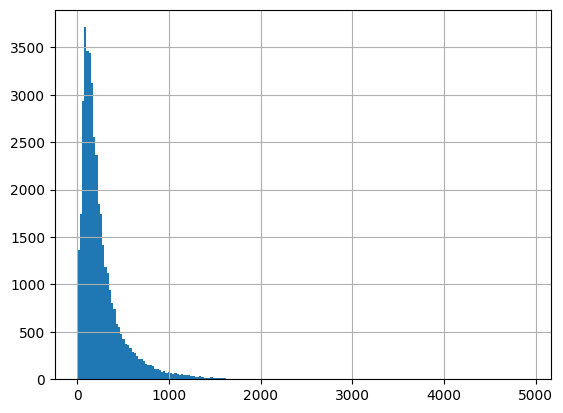

In [9]:
df['duration'].hist(bins=200)

<Axes: >

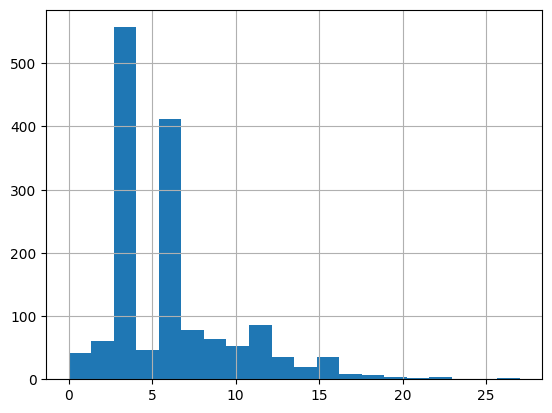

In [10]:
df[df['pdays'] != 999]['pdays'].hist(bins=20)

The following issues are apparent:
- `default` has so few "yes" values that the column may not be useful; however, with 20% being "unknown" there may still be some value in retaining it.
- `month` should be considered categorical because duration since last contact is more specifically expressed in `pdays` and this is mainly useful for month-specific things (e.g., December is unusual because of holiday trends).
- Similarly, `day_of_week` should be considered categorical. It may have been useful to simply consider weekday versus weekend, but in this dataset all days are weekdays.
- Other categorical fields are `job`, `marital`, `education`, `housing`, `loan`, `contact`, and `poutcome`.
- The field `previous` has only a few integer values, mostly clustered around 0, with 0 being by far the most common value.
- The fields `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed` are each floating point values across a well-defined range. They should be scaled with `MinMaxScaler`.
- `duration`, as noted in the description, should not be used for prediction; and, if used for analysis after the fact, the special value of 0 should be treated separately. Since the end task of distinguishing between the performance of different classifiers is not aided by the use of duration, we can drop this column entirely.
- `pdays` has a special value of 999 that should be handled separately. Additionally, the non-999 entries are so few that we don't have enough data to really use them effectively. So the best use of `pdays` is simply to coerce it to a binary value indicating whether a potential customer has been previously contacted.
- `y` should be coerced into 1 ('yes') or 0 ('no').
- Several fields contain an 'unknown' value. These likely can be left as-is rather than dropped.

Dataframe modifications will be performed under Problem 5 below.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to reduce the number of direct marketing contacts without reducing the total number of conversions; and, secondarily, to run marketing campaigns more efficiently, with lower costs and time expended. To do this, the effort aims to evaluate several types of classifiers and pick the most effective one, so that only the customers most likely to convert are contacted; this more-focused targeting will reduce the number of reachouts (and along with it, the negative impact on customer goodwill), the cost, and the time expenditure of the campaign.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
## Apply modifications determined in Problem 3 above.

# One-hot encode categorical features
categories = [
    'job', 'marital', 'education', 'housing',
    'month', 'day_of_week',
    'loan', 'contact', 'poutcome']
#df2 = pd.get_dummies(df, columns = categories)
df2 = df.copy()
df2.drop(columns = ['default', 'duration'], inplace = True)

# Set prev_contact according to previous contact, and drop `pdays`
df2['prev_contact'] = (df2['pdays'] != 999)
df2.drop(columns = ['pdays'], inplace = True)

## Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=['int64', 'float64'])),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), make_column_selector(dtype_include=object))
    ],
    remainder='passthrough')
preprocessor.set_output(transform="pandas")
preprocessor.verbose_feature_names_out = False

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
train, test = train_test_split(df2)
X_train = train.drop(columns = 'y')
y_train = train['y']
X_test = test.drop(columns = 'y')
y_test = test['y']

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  poutcome        41188 non-null  object 
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
df2['y'].value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


For this application, only 11% of users respond to the reachout. Therefore we can simply establish a baseline of assuming that nobody converts; this simple baseline has an 89% accuracy rate!

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
lr = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', lr)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7acee02411c0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aceda42a780>)],
                                   verbose_feature_names_out=False)),
                ('logreg', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [15]:
pipeline.score(X_test, y_test)

0.9015247159366806

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
results = pd.DataFrame(columns = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
newrow = {}

In [17]:
start = time.time()

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
lr_pipeline.fit(X_train, y_train)

end = time.time()

elapsed = end - start

newrow['Model'] = 'Logistic Regression'
newrow['Train Time'] = end - start
newrow['Train Accuracy'] = lr_pipeline.score(X_train, y_train)
newrow['Test Accuracy'] = lr_pipeline.score(X_test, y_test)

results.loc[len(results)] = newrow

In [18]:
start = time.time()

knnc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knnc', KNeighborsClassifier())
])
knnc_pipeline.fit(X_train, y_train)

end = time.time()

elapsed = end - start

newrow['Model'] = 'KNN'
newrow['Train Time'] = end - start
newrow['Train Accuracy'] = knnc_pipeline.score(X_train, y_train)
newrow['Test Accuracy'] = knnc_pipeline.score(X_test, y_test)

results.loc[len(results)] = newrow

In [19]:
start = time.time()

dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42))
])
dtc_pipeline.fit(X_train, y_train)

end = time.time()

newrow['Model'] = 'Decision Tree'
newrow['Train Time'] = end - start
newrow['Train Accuracy'] = dtc_pipeline.score(X_train, y_train)
newrow['Test Accuracy'] = dtc_pipeline.score(X_test, y_test)

results.loc[len(results)] = newrow

In [20]:
start = time.time()

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=42))
])
svc_pipeline.fit(X_train, y_train)

end = time.time()

newrow['Model'] = 'SVM'
newrow['Train Time'] = end - start
newrow['Train Accuracy'] = svc_pipeline.score(X_train, y_train)
newrow['Test Accuracy'] = svc_pipeline.score(X_test, y_test)

results.loc[len(results)] = newrow

In [21]:
results = results.set_index('Model')
results

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.899121,0.899777,0.901525
KNN,0.200590,0.912078,0.893464
Decision Tree,0.970388,0.994756,0.847043
SVM,137.673620,0.905539,0.899582


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Train score: 0.9004564436243566
Test score: 0.9007477906186268
Params: {'logreg__C': 0.01, 'logreg__solver': 'sag'})
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      9161
         yes       0.67      0.20      0.30      1136

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.62     10297
weighted avg       0.88      0.90      0.88     10297

[[9053  108]
 [ 914  222]]


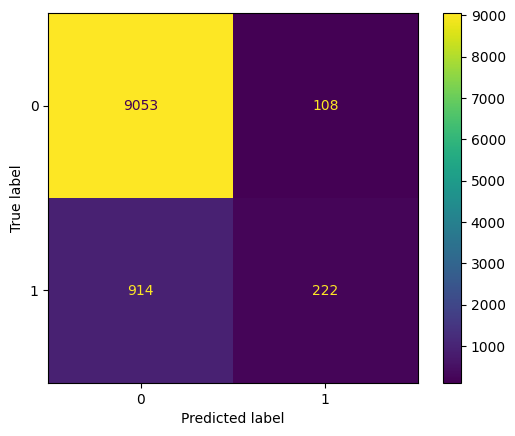

In [40]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

params = {
    'logreg__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
lr_gs = GridSearchCV(lr_pipeline, param_grid=params, cv=5, n_jobs=-1)
lr_gs.fit(X_train, y_train)
best_model = lr_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {lr_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

Train score: 0.7958952445696158
Test score: 0.7950859473633097
Params: {'logreg__C': 10, 'logreg__solver': 'lbfgs'})
              precision    recall  f1-score   support

          no       0.95      0.81      0.88      9161
         yes       0.30      0.64      0.41      1136

    accuracy                           0.80     10297
   macro avg       0.62      0.73      0.64     10297
weighted avg       0.88      0.80      0.82     10297

[[7455 1706]
 [ 404  732]]


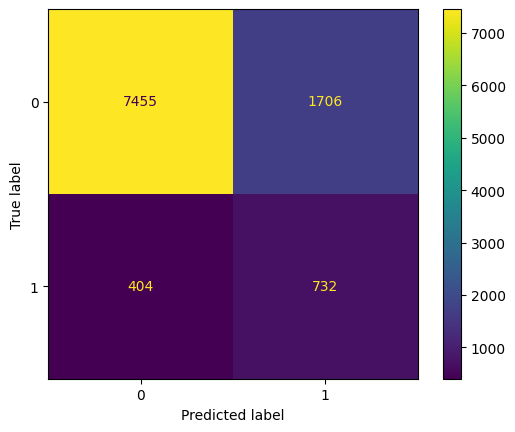

In [41]:
class_weight = {'no': 1, 'yes': 10}

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight))
])

params = {
    'logreg__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
lr_gs = GridSearchCV(lr_pipeline, param_grid=params, cv=5, n_jobs=-1)
lr_gs.fit(X_train, y_train)
best_model = lr_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {lr_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [37]:
params = {
    'knnc__n_neighbors': range(3,15, 2),
    'knnc__p': [1, 2]
}
knnc_gs = GridSearchCV(knnc_pipeline, param_grid=params, n_jobs=-1)
knnc_gs.fit(X_train, y_train)
best_model = knnc_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {knnc_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train score: 0.9039849794438509
Test score: 0.8945323880741963
Params: {'knnc__n_neighbors': 13, 'knnc__p': 2})
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9161
         yes       0.55      0.24      0.34      1136

    accuracy                           0.89     10297
   macro avg       0.73      0.61      0.64     10297
weighted avg       0.87      0.89      0.88     10297

[[8933  228]
 [ 858  278]]


In [38]:
dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42, class_weight=class_weight))
])
params = {
    'dtc__max_depth': [2, 3, 5, 10, 15],
    'dtc__max_leaf_nodes': [None, 5, 10, 50, 100]
}
dtc_gs = GridSearchCV(dtc_pipeline, param_grid=params, n_jobs=-1)
dtc_gs.fit(X_train, y_train)
best_model = dtc_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {dtc_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Train score: 0.8350976012430805
Test score: 0.835291832572594
Params: {'dtc__max_depth': 2, 'dtc__max_leaf_nodes': None})
              precision    recall  f1-score   support

          no       0.94      0.87      0.90      9161
         yes       0.35      0.58      0.44      1136

    accuracy                           0.84     10297
   macro avg       0.65      0.72      0.67     10297
weighted avg       0.88      0.84      0.85     10297

[[7942 1219]
 [ 477  659]]


In [ ]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=42))
])
params = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}
svc_gs = GridSearchCV(svc_pipeline, param_grid=params, n_jobs=-1)
svc_gs.fit(X_train, y_train)
best_model = svc_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {svc_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=42, class_weight=class_weight))
])
params = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}
svc_gs = GridSearchCV(svc_pipeline, param_grid=params, n_jobs=-1)
svc_gs.fit(X_train, y_train)
best_model = svc_gs.best_estimator_

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")
print(f"Params: {svc_gs.best_params_})")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# All models perform similarly, and slightly better than baseline
Between `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `SVC`, all classifiers performed similarly. The only notable deviation in performance was that decision trees showed typical overfitting behavior, as indicated by training scores that exceeded the other classifiers, but test scores that lagged behind. All performed _slightly_ better than the baseline performance, and no hyperparameter tuning resulted in more than a negligible improvement. Similarly, looking at all groups in the confusion matrix showed broadly similar performance.

# Beyond accuracy: Considering precision and recall
However, accuracy turns out to not be the most reliable metric. Since the client is most interested in expending effort on clients who will churn, and is interested to a lesser degree in expending efforts on customers who don't churn, it makes sense to look in detail at the confusion matrix. Specifically, we can apply the following interpretations:
- **True label = yes**: These are customers who churned. These are the ones who the client is willing to spend money, time, and goodwill in order to retain.
- **True label = no**: These customers are secure. Ideally the client would not expend effort in retaining them; but needlessly spending on a non-churning customer is worse than failing to reach out to a customer who is churning.
- **True positives**: These are customers who churn, and who are correctly predicted by the classifier as churning. The client is happy to expend effort on retention.
- **True negatives**: These customers are secure, and the client is happy to not expend effort on retaining them.
- **False positives**: These customers are secure, but a model failure is causing the client to needlessly spend money, time, and goodwill on retaining them.
- **False negatives**: This represents customers who are churning, but who due to the model failure are not being subjected to retention attempts. This is the worst category, since it can directly result in significant monetary loss.

Given that false negatives are significantly worse than false positives, it makes sense to bias the model toward avoiding false negatives even if it means accepting some false positives. In the same vein, we wish to prioritize recall for "yes" results over precision.

# Results from biasing
Given the varying performance of linear regression models, we opt for the linear regression model. Without bias, it features a recall of 20% with a precision of 67%, with an overall accuracy of 90% that slightly outperforms the baseline. But, biasing toward "yes" results by assigning a class weight of 5, we can improve recall to 64% while only regressing precision to 30%. In absolute numbers, we reduce the number of false negatives from 914 to 404, while only increasing false positives from 108 to 1706, and incrasing the true positives from 222 to 732. Looking solely at the differences, we move 510 customers from "false negative" to "true positive," paying the price by moving 1598 customers from "true negative" to "false positive." The cost:benefit ratio of 1598:510 ≈ 3:1 is a tradeoff that the client is happy to make: in order to gain the significant benefit from retaining a customer who is prone to churn, they are quite satisfied to expend the time, money, and goodwill even on triple the number of customers, since the benefit still significantly outweighs the cost.

KNN classifiers do not offer options to biasing, but the other classifiers do. Decision tree classifiers, for example, can be improved to 58% recall at a cost of reducing precision to 35%. However, linear regression still outperforms when using this biasing approach.

# Next steps
The best next steps will be to further refine the biasing approach, with a more rigorous definition of how many accepted false positives it takes to "pay for" turning a false negative into a true positive. From there, iterative refinement to find optimal class weights should yield an optimal model.

##### Questions